# Forecast en R dentro de Sagemaker

En SageMaker Studio pueden trabajarse notebooks en R si se cuenta con una licencia de RStudio, pero otra manera de poder trabajar en R es levantar un notebook de Sagemaker y seleccionar el kernel de R para ejecutarlo.

![an image caption Source: Ultimate Funny Dog Videos Compilation 2013.](./img/r_img01.PNG)

Dentro del notebook, instalaremos primero las librerías necesarias

In [1]:
install.packages('forecast', dependencies = TRUE)
install.packages("tidyverse")
install.packages("xts")   
install.packages("sqldf")
install.packages("dplyr")   
install.packages("tsibble")

also installing the dependencies ‘diffobj’, ‘quadprog’, ‘x13binary’, ‘brio’, ‘desc’, ‘pkgload’, ‘praise’, ‘waldo’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘forecTheta’, ‘rticles’, ‘seasonal’, ‘testthat’, ‘uroot’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘systemfonts’, ‘textshaping’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘systemfonts’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Up

In [2]:
library(forecast)
library(ggplot2)
library(sqldf)
library("xts")
library("dplyr")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



################################### WARNING ###################################
# We noticed you have dplyr installed. The dplyr lag() function breaks how    #
# base R's lag() function is supposed to work, which breaks lag(my_xts).      #
#                                                                             #
# If you call library(dplyr) later in this session, then calls to lag(my_xts) #
# that you enter or source() into this session won't work correctly.          #
#                                                                             #
# All package code is unaffecte

In [3]:
install.packages("tidyr")
install.packages("feasts")
install.packages('fable')
install.packages('fabletools')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘distributional’, ‘warp’, ‘fabletools’, ‘slider’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [83]:
library(tsibble)
library(feasts)
library(fabletools)
library(fable)

In [6]:
install.packages("readr")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [7]:
library(readr)

In [23]:
install.packages('prettyR')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [24]:
library(prettyR)

Utilizaremos este dataset de [kaggle](https://www.kaggle.com/datasets/podsyp/time-series-starter-dataset?resource=download) para hacer la demostración de forecast en R. Lo descargamos localmente y luego subimos el archivo csv en el ambiente de nuestro notebook. En este caso, dentro de la carpeta *data*.

In [62]:
df <- read_csv("./data/Month_Value_1.csv", show_col_types = FALSE)

In [63]:
head(df)

Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
01.01.2015,16010072,12729,1257.764,30024676
01.02.2015,15807587,11636,1358.507,30024676
01.03.2015,22047146,15922,1384.697,30024676
01.04.2015,18814583,15227,1235.607,30024676
01.05.2015,14021480,8620,1626.622,30024676
01.06.2015,16783929,13160,1275.375,30024676


El dataset es un histórico de datos mensuales de ventas y ganancias de una compañía. Para este ejercicio, buscaremos demostrar el uso de las herramientas de R para forecast de series de tiempo con la variable *Revenue*.

In [64]:
colSums(is.na(df))

Period 
                                       0 
                                 Revenue 
                                      32 
                          Sales_quantity 
                                      32 
                            Average_cost 
                                      32 
The_average_annual_payroll_of_the_region 
                                      32

In [65]:
tail(df,33)

Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
01.04.2020,52320693,26615,1965.835,29044998
01.05.2020,NA,NA,NA,NA
01.06.2020,NA,NA,NA,NA
01.07.2020,NA,NA,NA,NA
01.08.2020,NA,NA,NA,NA
01.09.2020,NA,NA,NA,NA
01.10.2020,NA,NA,NA,NA
01.11.2020,NA,NA,NA,NA
01.12.2020,NA,NA,NA,NA


In [66]:
df <- na.omit(df)

In [67]:
tail(df)

Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
01.11.2019,36374956,21987,1654.385,29878525
01.12.2019,58756474,38069,1543.420,29878525
01.01.2020,56288301,27184,2070.641,29044998
01.02.2020,40225243,23509,1711.057,29044998
01.03.2020,50022165,32569,1535.883,29044998
01.04.2020,52320693,26615,1965.835,29044998


In [68]:
df <- df |> mutate(Period = as.Date(Period, format = "%d.%m.%Y"))

In [69]:
describe(df)

Description of df 



 Numeric 
                                                mean     median          var
Revenue                                  32360452.26 32090875.1 1.355245e+14
Sales_quantity                              19197.38    18368.0 4.344507e+07
Average_cost                                 1695.06     1654.4 8.811683e+04
The_average_annual_payroll_of_the_region 28690829.62 28197847.0 1.117652e+12
                                                  sd valid.n
Revenue                                  11641498.54      64
Sales_quantity                               6591.29      64
Average_cost                                  296.84      64
The_average_annual_payroll_of_the_region  1057190.52      64

In [70]:
tail(df)

Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
<date>,<dbl>,<dbl>,<dbl>,<dbl>
2019-11-01,36374956,21987,1654.385,29878525
2019-12-01,58756474,38069,1543.420,29878525
2020-01-01,56288301,27184,2070.641,29044998
2020-02-01,40225243,23509,1711.057,29044998
2020-03-01,50022165,32569,1535.883,29044998
2020-04-01,52320693,26615,1965.835,29044998


In [75]:
z <- ts(df[c("Revenue")], start = c(2015, 1), frequency = 12)
dfts <- as_tsibble(z)

In [76]:
dfts

index,value
<mth>,<dbl>
2015 Jan,16010072
2015 Feb,15807587
2015 Mar,22047146
2015 Apr,18814583
2015 May,14021480
2015 Jun,16783929
2015 Jul,19161892
2015 Aug,15204984
2015 Sep,20603940


Lo primero en cualquier ejercicio relacionado con series de tiempo es graficar los datos. Con la finalidad de poder ver patrones y comportamientos que nos permitan definir cuál es el mejor método a utilizar.

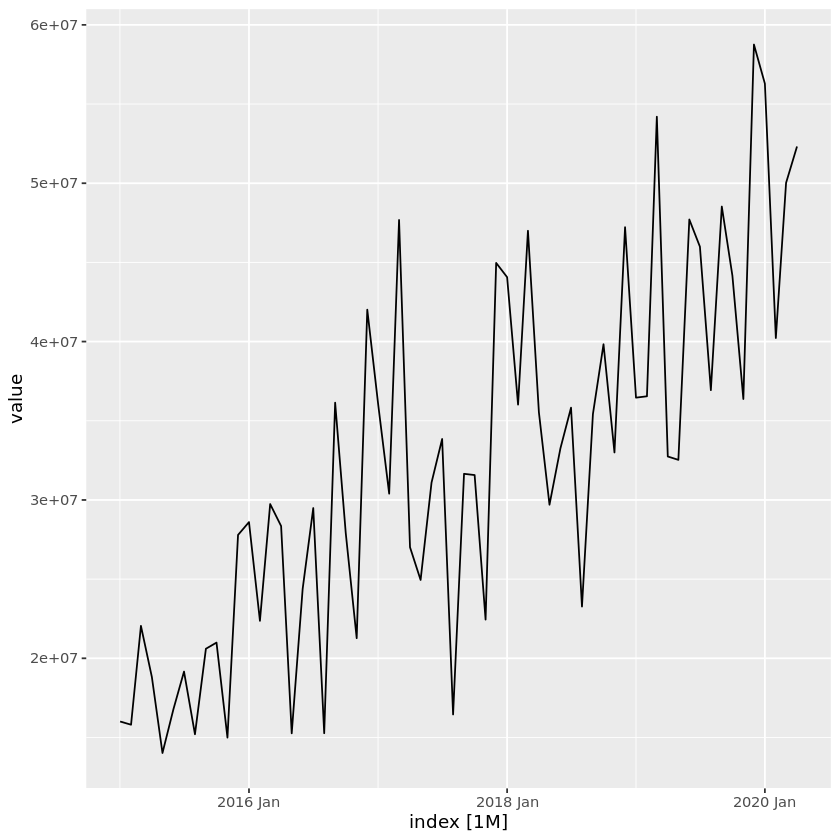

In [78]:
autoplot(dfts, value)

El gráfico anterior nos muestra que la serie de tiempo tiene una tendencia positiva (trend) y una alta estacionabilidad anual. Este último comportamiento podremos verlo mejor en el siguiente gráfico

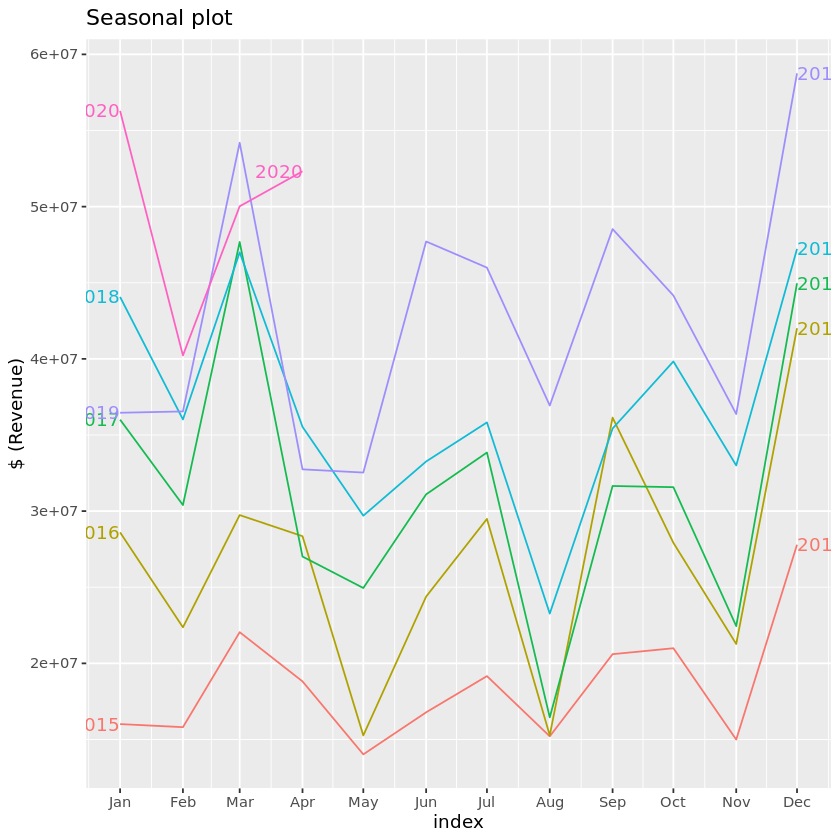

In [80]:
dfts |>
  gg_season(value, labels = "both") +
  labs(y = "$ (Revenue)",
       title = "Seasonal plot")

Un método muy empleado es la descomposición de las series de tiempo. En las siguiente celda, separamos a la serie de tiempo en sus componentes, mostrando cuatro gráficos en total <br>
* Serie de tiempo original
* Trend - tendencia
* Seasonal - estacionalidad
* Remainder - restante de lo anterior

Warning message:
“Removed 6 rows containing missing values (`geom_line()`).”


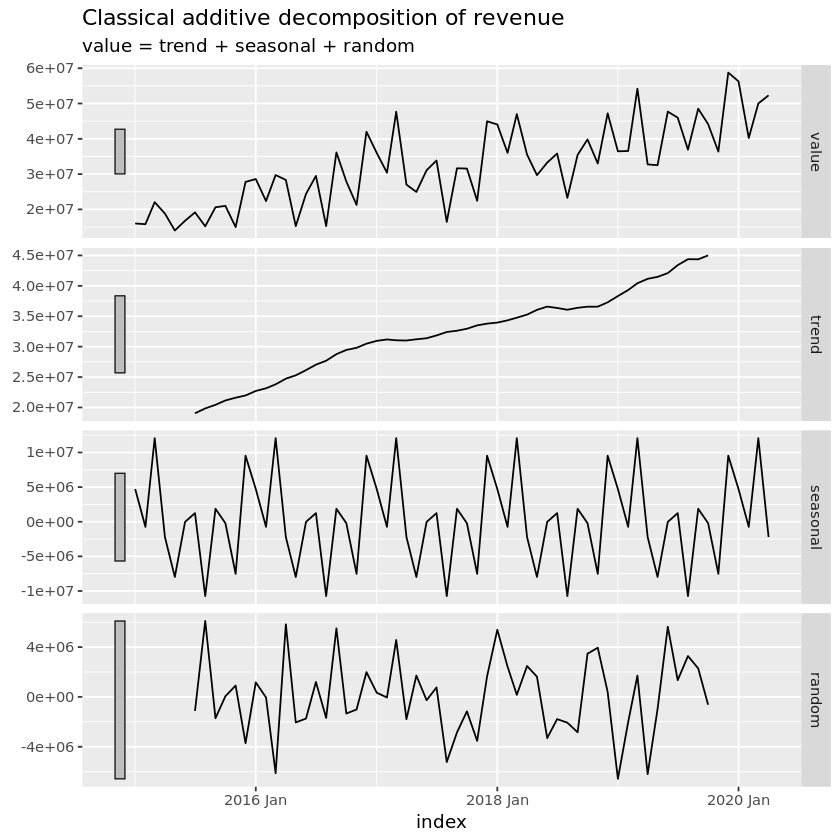

In [93]:
dfts |>
  model(
    classical_decomposition(value, type = "additive")
  ) |>
  components() |>
  autoplot() +
  labs(title = "Classical additive decomposition of revenue")

En la siguientes celdas, buscaremos hacer un forecast del componente estacional, y de la serie de tiempo *sin* el componente estacional, para luego hacer una predicción total sumando las dos predicciones anteriores.

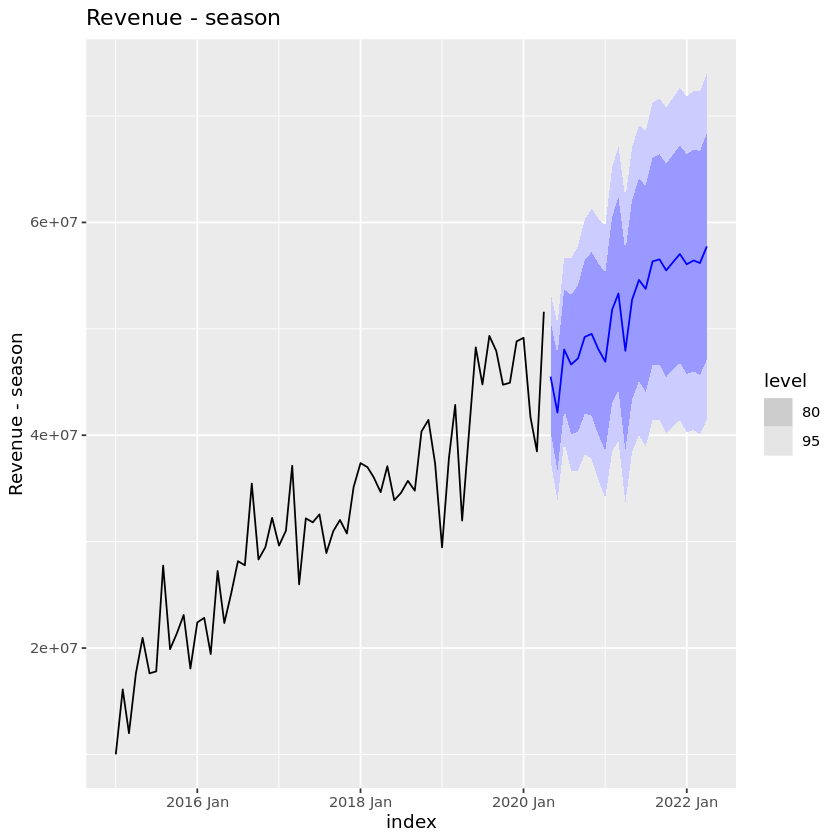

In [91]:
dcmp <- dfts |>
  model(STL(value ~ season(period=12), robust = TRUE)) |>
  components() |>
  select(-.model)

dcmp |>
  model(ARIMA(season_adjust ~ season(period=12))) |>
  forecast() |>
  autoplot(dcmp) +
  labs(y = "Revenue - season",
       title = "Revenue - season")

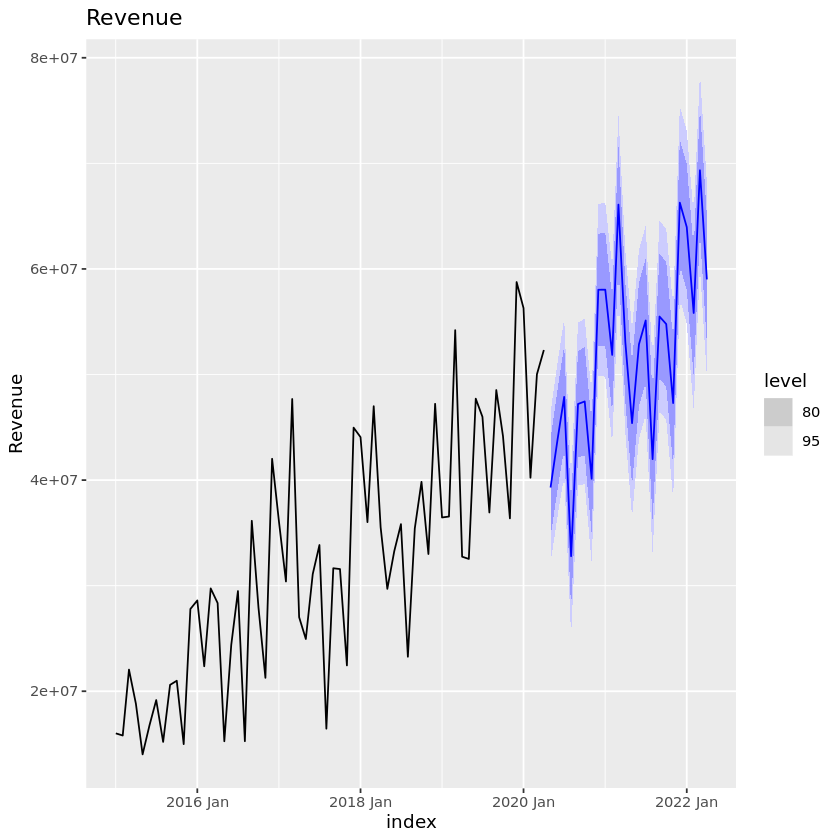

In [92]:
fit_dcmp <- dfts |>
  model(stlf = decomposition_model(
    STL(value ~ season(period=12), robust = TRUE),
    ARIMA(season_adjust)
  ))
fit_dcmp |>
  forecast() |>
  autoplot(dfts)+
  labs(y = "Revenue",
       title = "Revenue")

Con esto ya hemos hecho un ejercicio sencillo de predicción de series de tiempo, utilizando un notebook de SageMaker para poder trabajar en R y explorar los datos utilizando los recursos de cómputo de este servicio.

Para estudiar más sobre el forecast con R, este [libro](https://otexts.com/fpp3/) es una introducción completa a los métodos de predicción, siendo uno de los mejores libros para el análisis de series temporales.